In [1]:
from savant_data_downloader.savant_data_downloader import get_new_data
import polars as pl
from datetime import datetime, date
import pybaseball as pb
import pprint
from utils import get_sheet_data, get_ABS_universe

In [2]:
abs_challenges_end_ab = pl.read_csv("data/abs_challenges_end_ab.csv")

In [35]:
manual_data = get_sheet_data()
manual_data

abs_index,abs_successful,abs_type,abs_caller,game_date,batter_first_name,batter_last_name,pitcher_first_name,pitcher_last_name,home_team,away_team,inning,outs_when_up,balls,strikes,source,Contributor
i32,str,str,str,date,str,str,str,str,str,str,i8,i8,i8,i8,str,str
0,"""yes""","""Strike To Ball""","""batter""",2025-02-22,"""Everson""","""Pereira""","""Eric""","""Pardinho""","""TOR""","""NYY""",6,2,3,2,"""https://www.espn.com/mlb/story…","""Seth Billiau"""
1,"""yes""","""Ball To Strike""","""catcher""",2025-02-21,"""Kyle""","""Farmer""","""Corbin""","""Burnes""","""AZ""","""COL""",1,1,1,2,"""https://www.sportico.com/leagu…","""Seth Billiau"""
2,"""yes""","""Ball To Strike""","""catcher""",2025-02-20,"""Max""","""Muncy""","""Cody""","""Poteet""","""LAD""","""CHC""",1,0,0,1,"""https://www.mlb.com/video/cubs…","""Seth Billiau"""
3,"""yes""","""Strike To Ball""","""batter""",2025-02-23,"""Andy""","""Pages""","""Manuel""","""Castro""","""LAD""","""SD""",3,2,0,2,"""https://x.com/TalkingFriars/st…","""Seth Billiau"""
4,"""yes""","""Ball To Strike""","""catcher""",2025-02-25,"""Cole""","""Fontenelle""","""Yuki""","""Matsui""","""SD""","""LAA""",5,0,1,1,"""https://x.com/TalkingFriars/st…","""Seth Billiau"""
5,"""yes""","""Ball To Strike""","""catcher""",2025-02-25,"""Rio""","""Foster""","""Jacob""","""Higginbotham""","""SD""","""LAA""",8,0,3,2,"""https://x.com/TalkingFriars""","""Seth Billiau"""
6,"""no""","""Ball To Strike""","""catcher""",2025-02-25,"""Carter""","""Kieboom""","""Omar""","""Cruz""","""SD""","""LAA""",7,0,2,2,"""https://x.com/TalkingFriars/st…","""Seth Billiau"""
7,"""no""","""Ball To Strike""","""catcher""",2025-02-21,"""Jazz""","""Chisholm""","""Eric""","""Orze""","""NYY""","""TB""",3,2,3,2,"""https://x.com/JomboyMedia/stat…","""Seth Billiau"""


In [36]:
start_date = '2025-02-01'

today = date.today()
print("Today's date:", today)

# To format the date, you can use strftime()
end_date = today.strftime("%Y-%m-%d") # Year-month-day
print("Formatted date:", end_date)

# Pull all spring training pitches
data = get_new_data(start_date, end_date)

ABS_universe = get_ABS_universe(data)

Today's date: 2025-03-02
Formatted date: 2025-03-02


Fetching Statcast Data: 100%|███████████████████| 30/30 [00:00<00:00, 42.38it/s]


In [64]:
joined_data = manual_data.join(
    ABS_universe, 
    ['game_date', 'inning', 'balls', 'strikes', 'outs_when_up', 'home_team', 'away_team'],
    how="left"
)
joined_data

abs_index,abs_successful,abs_type,abs_caller,game_date,batter_first_name,batter_last_name,pitcher_first_name,pitcher_last_name,home_team,away_team,inning,outs_when_up,balls,strikes,source,Contributor,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,type,hit_location,…,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
i32,str,str,str,date,str,str,str,str,str,str,i8,i8,i8,i8,str,str,str,f64,f64,f64,str,i64,i64,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,i64,…,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64
0,"""yes""","""Strike To Ball""","""batter""",2025-02-22,"""Everson""","""Pereira""","""Eric""","""Pardinho""","""TOR""","""NYY""",6,2,3,2,"""https://www.espn.com/mlb/story…","""Seth Billiau""","""FF""",93.1,-1.2,5.62,"""Pardinho, Eric""",677592,672078,"""walk""","""ball""",null,null,null,null,14,"""Everson Pereira walks.""","""S""","""R""","""R""","""B""",null,…,"""4-Seam Fastball""",4,0,0,4,0,4,0,4,"""Standard""","""Standard""",218,-0.008,null,null,null,null,null,null,4,-4,0.951,0.049,24,24,24,24,1,2,null,null,null,null,1.04,0.67,0.67,null
1,"""yes""","""Ball To Strike""","""catcher""",2025-02-21,"""Kyle""","""Farmer""","""Corbin""","""Burnes""","""AZ""","""COL""",1,1,1,2,"""https://www.sportico.com/leagu…","""Seth Billiau""","""FC""",94.2,-0.79,5.98,"""Burnes, Corbin""",571657,669203,"""strikeout""","""called_strike""",null,null,null,null,9,"""Kyle Farmer called out on stri…","""S""","""R""","""R""","""S""",2,…,"""Cutter""",0,0,0,0,0,0,0,0,"""Standard""","""Standard""",194,0.015,null,null,null,null,null,null,0,0,0.522,0.478,30,34,31,35,1,0,null,null,null,null,1.47,-0.11,-0.11,null
2,"""yes""","""Ball To Strike""","""catcher""",2025-02-20,"""Max""","""Muncy""","""Cody""","""Poteet""","""LAD""","""CHC""",1,0,0,1,"""https://www.mlb.com/video/cubs…","""Seth Billiau""","""FF""",95.1,-1.18,6.32,"""Poteet, Cody""",571970,547001,null,"""called_strike""",null,null,null,null,9,"""Max Muncy called out on strike…","""S""","""L""","""R""","""S""",null,…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,"""Strategic""","""Strategic""",216,0.0,null,null,null,null,null,null,0,0,0.583,0.583,30,34,31,35,1,0,null,null,null,null,1.24,0.7,-0.7,null
3,"""yes""","""Strike To Ball""","""batter""",2025-02-23,"""Andy""","""Pages""","""Manuel""","""Castro""","""LAD""","""SD""",3,2,0,2,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""SI""",94.5,-1.09,6.1,"""Castro, Manuel""",681624,701195,null,"""ball""",null,null,null,null,12,"""Andy Pages called out on strik…","""S""","""R""","""R""","""B""",null,…,"""Sinker""",3,2,3,2,2,3,3,2,"""Standard""","""Standard""",221,0.0,null,null,null,null,null,null,1,1,0.693,0.693,23,24,23,25,1,1,null,null,null,null,1.3,1.16,1.16,null
4,"""yes""","""Ball To Strike""","""catcher""",2025-02-25,"""Cole""","""Fontenelle""","""Yuki""","""Matsui""","""SD""","""LAA""",5,0,1,1,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""FF""",90.9,2.07,6.14,"""Matsui, Yuki""",694304,673513,null,"""called_strike""",null,null,null,null,8,"""Cole Fontenelle grounds into a…","""S""","""R""","""L""","""S""",null,…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,"""Standard""","""Standard""",161,0.0,null,null,null,null,

In [82]:
joined_data = joined_data.with_columns(
    pl.when(pl.col('abs_type').str.contains("Strike To Ball")).then(pl.lit("blue")).otherwise(pl.lit("red")).alias('color')
)
joined_data

abs_index,abs_successful,abs_type,abs_caller,game_date,batter_first_name,batter_last_name,pitcher_first_name,pitcher_last_name,home_team,away_team,inning,outs_when_up,balls,strikes,source,Contributor,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,type,hit_location,…,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,color
i32,str,str,str,date,str,str,str,str,str,str,i8,i8,i8,i8,str,str,str,f64,f64,f64,str,i64,i64,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64,str
0,"""yes""","""Strike To Ball""","""batter""",2025-02-22,"""Everson""","""Pereira""","""Eric""","""Pardinho""","""TOR""","""NYY""",6,2,3,2,"""https://www.espn.com/mlb/story…","""Seth Billiau""","""FF""",93.1,-1.2,5.62,"""Pardinho, Eric""",677592,672078,"""walk""","""ball""",null,null,null,null,14,"""Everson Pereira walks.""","""S""","""R""","""R""","""B""",null,…,4,0,0,4,0,4,0,4,"""Standard""","""Standard""",218,-0.008,null,null,null,null,null,null,4,-4,0.951,0.049,24,24,24,24,1,2,null,null,null,null,1.04,0.67,0.67,null,"""blue"""
1,"""yes""","""Ball To Strike""","""catcher""",2025-02-21,"""Kyle""","""Farmer""","""Corbin""","""Burnes""","""AZ""","""COL""",1,1,1,2,"""https://www.sportico.com/leagu…","""Seth Billiau""","""FC""",94.2,-0.79,5.98,"""Burnes, Corbin""",571657,669203,"""strikeout""","""called_strike""",null,null,null,null,9,"""Kyle Farmer called out on stri…","""S""","""R""","""R""","""S""",2,…,0,0,0,0,0,0,0,0,"""Standard""","""Standard""",194,0.015,null,null,null,null,null,null,0,0,0.522,0.478,30,34,31,35,1,0,null,null,null,null,1.47,-0.11,-0.11,null,"""red"""
2,"""yes""","""Ball To Strike""","""catcher""",2025-02-20,"""Max""","""Muncy""","""Cody""","""Poteet""","""LAD""","""CHC""",1,0,0,1,"""https://www.mlb.com/video/cubs…","""Seth Billiau""","""FF""",95.1,-1.18,6.32,"""Poteet, Cody""",571970,547001,null,"""called_strike""",null,null,null,null,9,"""Max Muncy called out on strike…","""S""","""L""","""R""","""S""",null,…,0,0,0,0,0,0,0,0,"""Strategic""","""Strategic""",216,0.0,null,null,null,null,null,null,0,0,0.583,0.583,30,34,31,35,1,0,null,null,null,null,1.24,0.7,-0.7,null,"""red"""
3,"""yes""","""Strike To Ball""","""batter""",2025-02-23,"""Andy""","""Pages""","""Manuel""","""Castro""","""LAD""","""SD""",3,2,0,2,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""SI""",94.5,-1.09,6.1,"""Castro, Manuel""",681624,701195,null,"""ball""",null,null,null,null,12,"""Andy Pages called out on strik…","""S""","""R""","""R""","""B""",null,…,3,2,3,2,2,3,3,2,"""Standard""","""Standard""",221,0.0,null,null,null,null,null,null,1,1,0.693,0.693,23,24,23,25,1,1,null,null,null,null,1.3,1.16,1.16,null,"""blue"""
4,"""yes""","""Ball To Strike""","""catcher""",2025-02-25,"""Cole""","""Fontenelle""","""Yuki""","""Matsui""","""SD""","""LAA""",5,0,1,1,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""FF""",90.9,2.07,6.14,"""Matsui, Yuki""",694304,673513,null,"""called_strike""",null,null,null,null,8,"""Cole Fontenelle grounds into a…","""S""","""R""","""L""","""S""",null,…,0,0,0,0,0,0,0,0,"""Standard""","""Standard""",161,0.0,null,null,null,null,null,null,0,0,0.453,0.547,29,23,30,23,1,1,null,null,nul

In [83]:
#https://github.com/instant-replay-academy/MLB-PitchFx-Python/blob/master/GamedaySample.ipynb

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

"""matplotlib.pyplot is a collection of command shell style functions that make matplotlib 
work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, 
creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
Pyplot maintains state across calls."""

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szHeightInFeet = 3.5 - 1.5
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around
# ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, 1.5 - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))

# draw formal zone (plate only)
ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, 1.5), platewidthInFeet, szHeightInFeet))

my_colors = {'Ball to Strike':'tab:red', 'Strike to Ball':'tab:blue'}
# dray my pitch
ax1.scatter(x=joined_data["plate_x"], y=joined_data["plate_z"], color=joined_data["color"])

plt.ylim(0, 5)
plt.xlim(-2, 2)
# plt.show()

(-2.0, 2.0)

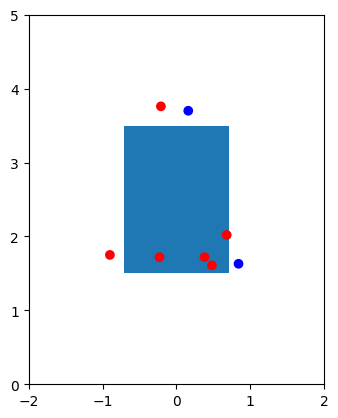

In [84]:
plt.show()